# Min / Max Forecast

In [1]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta  
import random

In [2]:
total_work_items = 30
now = datetime.now()

In [3]:
cycle_times = [2, 3, 5, 8, 3, 5 , 6, 2, 8, 1, 4, 3, 1]

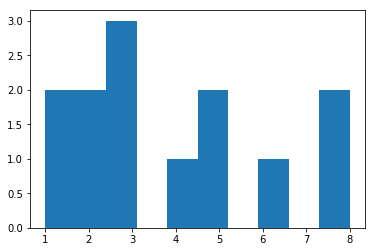

In [4]:
plt.hist(cycle_times);

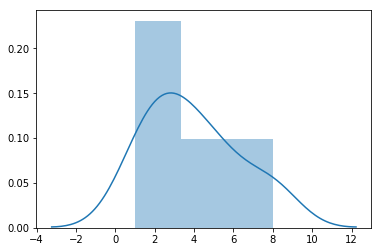

In [5]:
sns.distplot(cycle_times)

In [6]:
min(cycle_times), max(cycle_times)

(1, 8)

In [7]:
def cumulative_sum(total_work_items, cycle_times, selector):
    total = []
    for i, e in enumerate(range(total_work_items)):
        if i == 0:
            total.append(selector(cycle_times))
        else:
            total.append(selector(cycle_times) + total[i-1])
    return total    

In [8]:
cumulative_sum_min = cumulative_sum(total_work_items, cycle_times, min)
cumulative_sum_max = cumulative_sum(total_work_items, cycle_times, max)
cumulative_random = cumulative_sum(total_work_items, cycle_times, random.choice)

In [9]:
range_work_items = [x for x in range(total_work_items)]

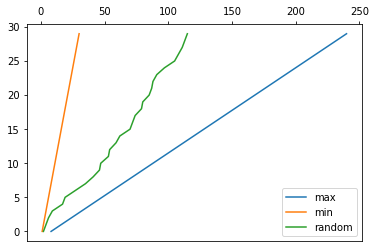

In [10]:
fig, ax = plt.subplots()
plt.plot(cumulative_sum_max, range_work_items, label='max')
plt.plot(cumulative_sum_min, range_work_items, label='min')
plt.plot(cumulative_random, range_work_items, label='random')
plt.legend(loc='best')

ax.xaxis.tick_top()

In [11]:
sum_min_days = max(cumulative_sum_min)
sum_max_days = max(cumulative_sum_max)
sum_random_days = max(cumulative_random)
sum_min_days, sum_max_days, sum_random_days

(30, 240, 115)

In [12]:
now.strftime('Start date %d %b %Y')

'Start date 21 Feb 2018'

In [13]:
min_end_date = now + timedelta(days=sum_min_days)
min_end_date.strftime('Best case %d %b %Y')

'Best case 23 Mar 2018'

In [14]:
max_end_date = now + timedelta(days=sum_max_days) 
max_end_date.strftime('Worst case %d %b %Y')

'Worst case 19 Oct 2018'

In [15]:
random_end_date = now + timedelta(days=sum_random_days) 
random_end_date.strftime('Random %d %b %Y')

'Random 16 Jun 2018'